# Final Project: Hate Crimes in India
## Maya Deshpande (USC ID: 8590996325)
## Professor Wensheng Wu
## DSCI-351

Please see section titled "Final Presentation: Demo" to see my finished analytics, exploration, and search functionalities for grading.

In [1]:
import os
import mysql
import mysql.connector as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import GridspecLayout, Button, Layout, jslink, IntText, IntSlider
from ipyleaflet import Map, Marker, basemaps, MarkerCluster
from ipywidgets import *
from IPython.display import display
from ipywidgets import interact, interact_manual

## 1) Establish connection with MySQL server

In [2]:
connection = sql.connect(host = "127.0.0.1", user = 'root', passwd = 'password',db = 'indiaHateCrimes')
cursor = connection.cursor()

In [3]:
connection

## 2) Read in SQL tables and clean data

In [4]:
hateCrimeTables = pd.read_sql_query('SHOW TABLES FROM indiaHateCrimes',connection)
names = ['tables']
hateCrimeTables.columns = names

In [5]:
hateCrimeTables

,tables
0,incident
1,legal
2,location
3,media
4,victim


In [6]:
incident_table = pd.read_sql_query('SELECT * FROM indiaHateCrimes.incident',connection)
incident_table

,_id,party_in_power,cow_related_violence,caste_related_violence,religion_related_violence,gender_related_violence,honour_killings,love_jihad,violence_against_adivasis,other,harassment,assault,killing,rape,sexual_harassment,property_damage
0,1,BJP,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,No
1,2,BJP,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No
2,3,SP,No,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No
3,4,SP,No,Yes,No,Yes,No,No,No,No,No,No,No,No,Yes,No
4,5,BJD,No,Yes,No,Yes,No,No,No,No,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,485,TRS,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,Yes
473,486,INC,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No
474,487,BJP,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No
475,488,INC,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No


In [7]:
legal_table = pd.read_sql_query('SELECT * FROM indiaHateCrimes.legal',connection)
# rename columns because there was a spelling error in previous column names.
names = ['_id','complaint','FIR','counter_FIR','charges_filed','court_hearing','convictionOrAcquittal','compensation']
legal_table.columns = names

legal_table

,_id,complaint,FIR,counter_FIR,charges_filed,court_hearing,convictionOrAcquittal,compensation
0,1,Yes,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0
2,3,Yes,0,0,0,0,0,0
3,4,Yes,"Yes, for alleged offenced under the SC/ST (Pre...",0,0,0,0,0
4,5,Yes,"Yes, under Section 376(2)(ii) of IPC, Section ...",0,0,0,0,0
...,...,...,...,...,...,...,...,...
472,485,Yes,0,0,0,0,0,0
473,486,Yes,Yes an FIR has been registred against the accu...,Yes a counter FIR has been registered against ...,0,0,0,0
474,487,0,0,0,0,0,0,0
475,488,Yes,0,0,0,0,0,0


In [8]:
location_table = pd.read_sql_query('SELECT * FROM indiaHateCrimes.location',connection)
location_table

,_id,city,district,state,latitude,longitude
0,1,Amreli,Amreli,Gujarat,21.603177,71.222083
1,2,Shivpuri,Shivpuri,Madhya Pradesh,25.435787,77.665066
2,3,Kataka,Muzaffarnagar,Uttar Pradesh,20.462521,85.882989
3,4,Khatoli,Muzaffarnagar,Uttar Pradesh,25.681659,76.475898
4,5,Iswarpur,Baleswar,Odisha,22.052155,87.733883
...,...,...,...,...,...,...
472,485,Warangal,Warangal,Telangana,17.968901,79.594054
473,486,Sangrur,Sangrur,Punjab,30.245796,75.842072
474,487,Muzaffarnagar,Muzaffarnagar,Uttar Pradesh,29.472682,77.708509
475,488,Channur,Gulbarga,Karnataka,17.329700,76.834300


In [9]:
media_table = pd.read_sql_query('SELECT * FROM indiaHateCrimes.media',connection)
#media_table = media_table.style.hide_index()
media_table

,_id,yy,Date,Month of Incident,Headline,links_to_publication
0,1,2015,25,December,National human rights body seeks report on Dal...,https://goo.gl/ys4TVg
1,2,2015,2,December,"Dalit youth dies in police custody, 2 cops sus...",https://goo.gl/48HHSP
2,3,2015,2,December,7 hurt in a clash between Dalit and muslim groups,https://goo.gl/xM5j3r
3,4,2015,5,December,Man arrested for sexually harassing Dalit woman,https://goo.gl/FjtHrn
4,5,2015,8,December,Teacher held for sexually abusing minor Dalit ...,https://goo.gl/XJFcCc
...,...,...,...,...,...,...
472,485,2017,26,September,Dalit activist Kancha Ilaiah escapes attack,https://goo.gl/bHbkPd
473,486,2017,19,September,Dalit women accuse upper-caste men of thrashin...,https://goo.gl/QQT4YJ
474,487,2017,10,September,Dalits flee homes after Thakurs threaten them,https://goo.gl/DBjHSg
475,488,2017,5,September,"Water in well used by Dalits, poisoned",https://goo.gl/NxPDwn


In [10]:
victim_table = pd.read_sql_query('SELECT * FROM indiaHateCrimes.victim',connection)
victim_table

,_id,victim_name,victim_ages,victim_ages2,victim_ages3,victim_ages4,male_no,female_no,others_no,number_of_victims,identity_dalit,identity_muslim,identity_adivasi,identity_transgender,identity_christian,identity_others
0,1,0,18,0,0,0,0,1,0,1,Yes,No,No,No,No,No
1,2,Kamal Vanshkar,19,0,0,0,1,0,0,1,Yes,No,No,No,No,No
2,3,"Sanjay, Rahul, Rafique",0,0,0,0,2,0,0,7,Yes,No,No,No,No,No
3,4,0,30,0,0,0,0,1,0,1,Yes,No,No,No,No,No
4,5,0,0,0,0,0,0,1,0,1,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,485,Kancha Ilaiah,0,0,0,0,1,0,0,1,Yes,Yes,No,No,No,No
473,486,0,0,0,0,0,0,4,0,4,Yes,Yes,No,No,No,No
474,487,0,0,0,0,0,0,0,0,1,Yes,Yes,No,No,No,No
475,488,0,0,0,0,0,0,0,0,0,Yes,Yes,No,No,No,No


The victim_table above shows a misalignment between _id's and indeces. 12 records from this table could not be transferred to the SQL database. This means we need to identify these records and exclude them from other tables.

The below loop finds which records are missing. 

In [11]:
# Find which records are missing in victim_tables

# id_list = victim_table['_id'].to_list()
# count=1
# for i in id_list:
#     if (i) != count+12:
#         print(i,count)
#     count = count+1

# The following records are missing from victim_table:
# id = 36, index = 35
# id = 81, index = 80
# id = 222, index = 221
# id = 223, index = 222
# id = 226, index = 225
# id = 251, index = 250
# id = 253, index = 252
# id = 312, index = 311
# id = 313, index = 312
# id = 328, index = 327
# id = 413, index = 412
# id = 424, index = 423

I used the below lines to check which indeces correspond to the above id's in other tables

In [12]:
# Check record _id's and corresponding indeces
# row_36_location = location_table.iloc[311,:]
# row_36_location

Now we can drop the identified records from other tables in Jupyter Notebook and in our SQL DB

In [13]:
# Drop records that aren't in victim_table from all other tables
victim_table = victim_table.drop(index=[35,80,221,222,225,250,252,311,312,327,412,423], axis=0)
location_table = location_table.drop(index=[35,80,221,222,225,250,252,311,312,327,412,423], axis=0)
media_table = media_table.drop(index=[35,80,221,222,225,250,252,311,312,327,412,423], axis=0)
legal_table = legal_table.drop(index=[35,80,221,222,225,250,252,311,312,327,412,423], axis=0)
incident_table = incident_table.drop(index=[35,80,221,222,225,250,252,311,312,327,412,423], axis=0)

In [14]:
# Drop records from SQL victim table
print("Drop from SQL Victim table:")
try:
    sql_delete_query = "DELETE FROM indiaHateCrimes.victim WHERE _id = %s"
    records_to_delete = [(36,), (81,),(222,),(223,),(226,),(251,),(253,),(312,),(313,),(328,),(413,),(424,)]
    cursor.executemany(sql_delete_query, records_to_delete)
    connection.commit()
    print(cursor.rowcount, " Records Deleted successfully")

except mysql.connector.Error as error:
    print("Failed to Delete records from MySQL table: {}".format(error))

print()
# Drop records from SQL location table
print("Drop from SQL Location table:")
try:
    sql_delete_query = "DELETE FROM indiaHateCrimes.location WHERE _id = %s"
    records_to_delete = [(36,), (81,),(222,),(223,),(226,),(251,),(253,),(312,),(313,),(328,),(413,),(424,)]
    cursor.executemany(sql_delete_query, records_to_delete)
    connection.commit()
    print(cursor.rowcount, " Records Deleted successfully")

except mysql.connector.Error as error:
    print("Failed to Delete records from MySQL table: {}".format(error))

print()
# Drop records from SQL media table
print("Drop from SQL Media table:")
try:
    sql_delete_query = "DELETE FROM indiaHateCrimes.media WHERE _id = %s"
    records_to_delete = [(36,), (81,),(222,),(223,),(226,),(251,),(253,),(312,),(313,),(328,),(413,),(424,)]
    cursor.executemany(sql_delete_query, records_to_delete)
    connection.commit()
    print(cursor.rowcount, " Records Deleted successfully")

except mysql.connector.Error as error:
    print("Failed to Delete records from MySQL table: {}".format(error))

print()
# Drop records from SQL legal table
print("Drop from SQL Legal table:")
try:
    sql_delete_query = "DELETE FROM indiaHateCrimes.legal WHERE _id = %s"
    records_to_delete = [(36,), (81,),(222,),(223,),(226,),(251,),(253,),(312,),(313,),(328,),(413,),(424,)]
    cursor.executemany(sql_delete_query, records_to_delete)
    connection.commit()
    print(cursor.rowcount, " Records Deleted successfully")

except mysql.connector.Error as error:
    print("Failed to Delete records from MySQL table: {}".format(error))

print()
# Drop records from SQL incident table
print("Drop from SQL Incident table:")
try:
    sql_delete_query = "DELETE FROM indiaHateCrimes.incident WHERE _id = %s"
    records_to_delete = [(36,), (81,),(222,),(223,),(226,),(251,),(253,),(312,),(313,),(328,),(413,),(424,)]
    cursor.executemany(sql_delete_query, records_to_delete)
    connection.commit()
    print(cursor.rowcount, " Records Deleted successfully")

except mysql.connector.Error as error:
    print("Failed to Delete records from MySQL table: {}".format(error))

Drop from SQL Victim table:
0  Records Deleted successfully

Drop from SQL Location table:
0  Records Deleted successfully

Drop from SQL Media table:
0  Records Deleted successfully

Drop from SQL Legal table:
0  Records Deleted successfully

Drop from SQL Incident table:
0  Records Deleted successfully


Note that the records were successfully dropped from all tables. The message only says '0' because this program was run multiple times.

Now that missing records have been handled, we can drop the _id column from tables and use the index instead.

In [15]:
victim_table = victim_table.drop('_id', axis=1)
location_table = location_table.drop('_id', axis=1)
media_table = media_table.drop('_id', axis=1)
legal_table = legal_table.drop('_id', axis=1)
incident_table = incident_table.drop('_id', axis=1)

## 3) Summarize & Visualize Data

Below is a summary of what each table looks like after cleaning.

In [16]:
print("Victim Data: ",victim_table.shape)
print("Location Data: ",location_table.shape)
print("Media Data: ",media_table.shape)
print("Legal Data: ",legal_table.shape)
print("Incident Data: ",incident_table.shape)

Victim Data:  (465, 15)
Location Data:  (465, 5)
Media Data:  (465, 5)
Legal Data:  (465, 7)
Incident Data:  (465, 15)


To map identity-specific hate crimes, we'll need to create dataframes for each identity's experienced hate crimes.

In [17]:
dalit_hate_crimes = victim_table[victim_table['identity_dalit'] == 'Yes']
muslim_hate_crimes = victim_table[victim_table['identity_muslim'] == 'Yes']
adivasi_hate_crimes = victim_table[victim_table['identity_adivasi'] == 'Yes']
trans_hate_crimes = victim_table[victim_table['identity_transgender'] == 'Yes']
christian_hate_crimes = victim_table[victim_table['identity_christian'] == 'Yes']

First we'll map hate crimes against Dalits.

In [18]:
# Make lists of _id's corresponding to hate crimes against people who identify as Dalit and for the latitudes
# and longitudes of those crimes.

dalit_id_list = dalit_hate_crimes.index.to_list()
dalit_latitudes = []
dalit_longitudes = []

for i in dalit_id_list:
    dalit_latitudes.append(location_table.loc[i]['latitude'])
    dalit_longitudes.append(location_table.loc[i]['longitude'])

In [19]:
# Create map markers for Dalit hate crimes
dalit_markers_list = []

for i in range(len(dalit_id_list)):
    marker = Marker(location=(dalit_latitudes[i], dalit_longitudes[i]), draggable=False)
    dalit_markers_list.append(marker)

marker_cluster = MarkerCluster(
    markers=(dalit_markers_list)
)

In [20]:
# Make a map that shows hate crimes against Dalit People per state
# Figure out how to stylize it
# Can you divide regions by state instead of random?
# all markers should look the same, the circle + numbers are a nice -- should we make them all one color?
center = (20.5937, 78.9629)

dalit_map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=5)

dalit_map.add_layer(marker_cluster);

display(dalit_map)

Map(center=[20.5937, 78.9629], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [21]:
# Let's find some other general stats about Dalit hate crimes.


Now, we'll map hate crimes against Muslims.

In [22]:
# Make lists of _id's corresponding to hate crimes against people who identify as Muslim and for the latitudes
# and longitudes of those crimes.

muslim_id_list = muslim_hate_crimes.index.to_list()
muslim_latitudes = []
muslim_longitudes = []

for i in muslim_id_list:
    muslim_latitudes.append(location_table.loc[i]['latitude'])
    muslim_longitudes.append(location_table.loc[i]['longitude'])

In [23]:
# Create map markers for Muslim hate crimes
muslim_markers_list = []

for i in range(len(muslim_id_list)):
    marker = Marker(location=(muslim_latitudes[i], muslim_longitudes[i]), draggable=False)
    muslim_markers_list.append(marker)

marker_cluster = MarkerCluster(
    markers=(muslim_markers_list)
)

In [24]:
# Make a map that shows hate crimes against Muslim people per state
center = (20.5937, 78.9629)

muslim_map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=5)

muslim_map.add_layer(marker_cluster);

display(muslim_map)

Map(center=[20.5937, 78.9629], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Next, we'll map hate crimes against Adivasi people.

In [25]:
# Make lists of _id's corresponding to hate crimes against people who identify as Adivasi and for the latitudes
# and longitudes of those crimes.

adivasi_id_list = adivasi_hate_crimes.index.to_list()
adivasi_latitudes = []
adivasi_longitudes = []

for i in adivasi_id_list:
    adivasi_latitudes.append(location_table.loc[i]['latitude'])
    adivasi_longitudes.append(location_table.loc[i]['longitude'])

In [26]:
# Create map markers for Adivasi hate crimes
adivasi_markers_list = []

for i in range(len(adivasi_id_list)):
    marker = Marker(location=(adivasi_latitudes[i], adivasi_longitudes[i]), draggable=False)
    adivasi_markers_list.append(marker)

marker_cluster = MarkerCluster(
    markers=(adivasi_markers_list)
)

In [27]:
# Make a map that shows hate crimes against Adivasi people per state
center = (20.5937, 78.9629)

adivasi_map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=5)

adivasi_map.add_layer(marker_cluster);

display(adivasi_map)

Map(center=[20.5937, 78.9629], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

We'll also map hate crimes against transgender people.

In [28]:
# Make lists of _id's corresponding to hate crimes against people who identify as transgender and for the latitudes
# and longitudes of those crimes.

trans_id_list = trans_hate_crimes.index.to_list()
trans_latitudes = []
trans_longitudes = []

for i in trans_id_list:
    trans_latitudes.append(location_table.loc[i]['latitude'])
    trans_longitudes.append(location_table.loc[i]['longitude'])

In [29]:
# Create map markers for transgender hate crimes
trans_markers_list = []

for i in range(len(trans_id_list)):
    marker = Marker(location=(trans_latitudes[i], trans_longitudes[i]), draggable=False)
    trans_markers_list.append(marker)

marker_cluster = MarkerCluster(
    markers=(trans_markers_list)
)

In [30]:
# Make a map that shows hate crimes against transgender people per state
center = (20.5937, 78.9629)

trans_map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=5)

trans_map.add_layer(marker_cluster);

display(trans_map)

Map(center=[20.5937, 78.9629], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Lastly, we'll map hate crimes against Christian people.

In [31]:
# Make lists of _id's corresponding to hate crimes against people who identify as Christian and for the latitudes
# and longitudes of those crimes.

christian_id_list = christian_hate_crimes.index.to_list()
christian_latitudes = []
christian_longitudes = []

for i in christian_id_list:
    christian_latitudes.append(location_table.loc[i]['latitude'])
    christian_longitudes.append(location_table.loc[i]['longitude'])

In [32]:
# Create map markers for Christian hate crimes
christian_markers_list = []

for i in range(len(christian_id_list)):
    marker = Marker(location=(christian_latitudes[i], christian_longitudes[i]), draggable=False)
    christian_markers_list.append(marker)

marker_cluster = MarkerCluster(
    markers=(christian_markers_list)
)

In [33]:
# Make a map that shows hate crimes against Christian people per state
center = (20.5937, 78.9629)

christian_map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=5)

christian_map.add_layer(marker_cluster);

display(christian_map)

Map(center=[20.5937, 78.9629], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [34]:
# make a pie chart for overall hate-crime breakdown
caste_hate_crimes = incident_table[incident_table['caste_related_violence'] == "Yes"]
caste_hate_crimes = len(caste_hate_crimes.index.to_list())

religion_hate_crimes = incident_table[incident_table['religion_related_violence'] == "Yes"]
religion_hate_crimes = len(religion_hate_crimes.index.to_list())

gender_hate_crimes = incident_table[incident_table['gender_related_violence'] == "Yes"]
gender_hate_crimes = len(gender_hate_crimes.index.to_list())

adivasi_hate_crimes = incident_table[incident_table['violence_against_adivasis'] == "Yes"]
adivasi_hate_crimes = len(adivasi_hate_crimes.index.to_list())

other_hate_crimes = incident_table[incident_table['other'] == "Yes"]
other_hate_crimes = len(other_hate_crimes.index.to_list())

In [35]:
# make a pie chart for legal
complaints = legal_table[legal_table['complaint'] == "Yes"]
complaints = len(complaints.index.to_list())

fir = legal_table[legal_table['FIR'] == "Yes"]
fir = len(fir.index.to_list())

counter_fir = legal_table[legal_table['counter_FIR'] == "Yes"]
counter_fir = len(counter_fir.index.to_list())

charges_filed = legal_table[legal_table['charges_filed'] == "Yes"]
charges_filed = len(charges_filed.index.to_list())

court_hearing = legal_table[legal_table['court_hearing'] == "Yes"]
court_hearing = len(court_hearing.index.to_list())

convictionOrAcquittal = legal_table[legal_table['convictionOrAcquittal'] == "Yes"]
convictionOrAcquittal = len(convictionOrAcquittal.index.to_list())

compensation = legal_table[legal_table['compensation'] == "Yes"]
compensation = len(compensation.index.to_list())


In [36]:
# make a pie chart for political party responsible for incidents
bjp_hate_crimes = incident_table[incident_table['party_in_power'] == "BJP"]
bjp_hate_crimes = len(bjp_hate_crimes.index.to_list())

sp_hate_crimes = incident_table[incident_table['party_in_power'] == "SP"]
sp_hate_crimes = len(sp_hate_crimes.index.to_list())

aap_hate_crimes = incident_table[incident_table['party_in_power'] == "AAP"]
aap_hate_crimes = len(aap_hate_crimes.index.to_list())

inc_hate_crimes = incident_table[incident_table['party_in_power'] == "INC"]
inc_hate_crimes = len(inc_hate_crimes.index.to_list())

jdu_hate_crimes = incident_table[incident_table['party_in_power'] == "JD(U)+"]
jdu_hate_crimes = len(jdu_hate_crimes.index.to_list())

aiadmk_hate_crimes = incident_table[incident_table['party_in_power'] == "AIADMK"]
aiadmk_hate_crimes = len(aiadmk_hate_crimes.index.to_list())

trs_hate_crimes = incident_table[incident_table['party_in_power'] == "TRS"]
trs_hate_crimes = len(trs_hate_crimes.index.to_list())

cpim_hate_crimes = incident_table[incident_table['party_in_power'] == "CPI(M)+"]
cpim_hate_crimes = len(cpim_hate_crimes.index.to_list())

npf_hate_crimes = incident_table[incident_table['party_in_power'] == "Nagaland People's Front"]
npf_hate_crimes = len(npf_hate_crimes.index.to_list())

tdp_hate_crimes = incident_table[incident_table['party_in_power'] == "TDP"]
tdp_hate_crimes = len(tdp_hate_crimes.index.to_list())

hate_crimes_by_party_list = np.array([bjp_hate_crimes, sp_hate_crimes, aap_hate_crimes, inc_hate_crimes, jdu_hate_crimes, aiadmk_hate_crimes, trs_hate_crimes, cpim_hate_crimes, npf_hate_crimes, tdp_hate_crimes])
mylabels = ["BJP", "SP", "AAP", "INC","JD(U)+","AIADMK","TRS","CPIM","NPF","TDP"]

In [37]:
dropdown = widgets.Dropdown(options=["Dalit","Muslim","Transgender","Adivasi","Christian"],description="Identity: ")

def show_map(identity):
    if identity == "Dalit":
        display(dalit_map)
    if identity == "Muslim":
        display(muslim_map)
    if identity == "Adivasi":
        display(adivasi_map)
    if identity == "Transgender":
        display(trans_map)
    if identity == "Christian":
        display(christian_map)
        
widgets.interact(show_map, identity=dropdown)

interactive(children=(Dropdown(description='Identity: ', options=('Dalit', 'Muslim', 'Transgender', 'Adivasi',…

<function __main__.show_map(identity)>

## Final Presentation: Demo

The code before this section is prep-work for the below summaries and visualizations. The following features include general analytics, data exploration, and search functionality.

### Section 1: General Analytics

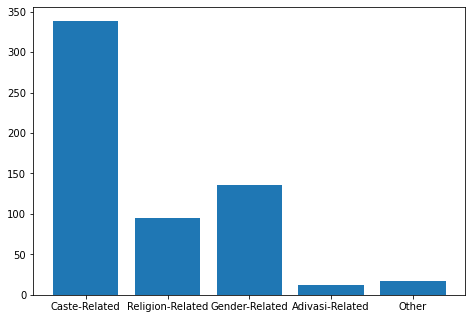

In [38]:
hate_crime_breakdown = plt.figure()
ax = hate_crime_breakdown.add_axes([0,0,1,1])
labels = ['Caste-Related', 'Religion-Related', 'Gender-Related', 'Adivasi-Related', 'Other']
bars = [caste_hate_crimes, religion_hate_crimes, gender_hate_crimes, adivasi_hate_crimes, other_hate_crimes]
ax.bar(labels, bars)
plt.show(hate_crime_breakdown)

Hate Crime Breakdown: The above graph is a general breakdown of hate-crimes in India. The graph shows that caste-related crimes happen at the highest volume and that gender-related crimes happen at the second highest volume. This confirms my identification of Dalit (lower-caste) women as a uniquely marginalized group.

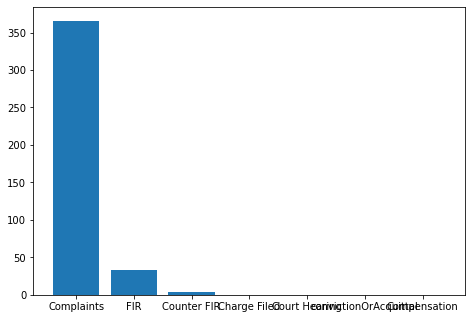

In [39]:
legal_breakdown = plt.figure()
ax = legal_breakdown.add_axes([0,0,1,1])
labels = ['Complaints', 'FIR', 'Counter FIR', 'Charge Filed', 'Court Hearing','convictionOrAcquittal','Compensation']
bars = [complaints, fir, counter_fir, charges_filed, court_hearing, convictionOrAcquittal, compensation]
ax.bar(labels, bars)
plt.show(hate_crime_breakdown)

Legal Breakdown: The above graph shows how many crimes are followed with complaints, first information reports (FIR), counter FIR's, charges filed, court hearings, convictions of acquittals, and compensation for the victim. These results are shocking; they show that despite the majority of hate-crime victims filing complaints, very few recieve FIR's from the police and even fewer get further legal justice.

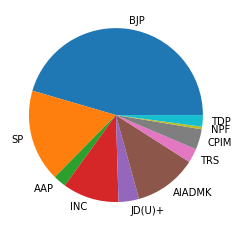

In [40]:
hate_crimes_by_party = plt.pie(hate_crimes_by_party_list, labels = mylabels)
plt.show(hate_crimes_by_party) 

Hate Crimes By Political Party: The above pie chart shows which Indian political parties in India are responsible for the highest number of hate-crimes. The Bharatiya Janata Party (BJP) is responsible for the highest number of hate crimes.

### Section 2: Data Exploration Using Locational Data

In [41]:
dropdown = widgets.Dropdown(options=["Dalit","Muslim","Transgender","Adivasi","Christian"],description="Identity: ")

def show_map(identity):
    if identity == "Dalit":
        display(dalit_map)
    if identity == "Muslim":
        display(muslim_map)
    if identity == "Adivasi":
        display(adivasi_map)
    if identity == "Transgender":
        display(trans_map)
    if identity == "Christian":
        display(christian_map)
        
widgets.interact(show_map, identity=dropdown)

interactive(children=(Dropdown(description='Identity: ', options=('Dalit', 'Muslim', 'Transgender', 'Adivasi',…

<function __main__.show_map(identity)>

Heat Map of India: The above map tells us the regions in India where hate-crimes are the highest. Users can filter these crimes based on identity to see where the least safe places are for a given identity.

### Section 3: Media Search

In [42]:
search_box = widgets.Text(
    placeholder='Enter keyword',
    description='Search:',
    disabled=False
)

def search(search_term):
    search_result = media_table[media_table['Headline'].str.contains(search_term)]
    display(search_result)

            
def on_submit_func(sender):
    print("Search Results: ")
    #search(search_box.value)
    

widgets.interact(search, search_term=search_box)
search_box.on_submit(on_submit_func)


interactive(children=(Text(value='', description='Search:', placeholder='Enter keyword'), Output()), _dom_clas…

Media Search: The above table consists of all of the media articles corresponding to different hate crimes. Users can search key terms to kinds articles with relevant headlines.

## End

Thank you for taking the time to review my analysis on Indian hate crimes.